classification with tensorflow 2.0

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
import pandas as pd
df= pd.read_csv('./final_analysis - Sheet1 - final_analysis - Sheet1.csv')

In [ ]:
df.head()

,gender,N1,N2,N5,N6,N8,N9,N10,A9,C9,lack_of_concentration,tiredness,sleep_hour,Mood_prediction
0,1,1,5,1,1,1,1,1,4,4,0,0,0,1
1,2,2,3,3,4,2,2,4,4,4,0,0,0,0
2,2,5,1,5,5,5,5,5,5,5,1,1,1,0
3,2,5,4,4,5,5,4,5,4,2,1,1,1,0
4,2,3,3,3,3,3,3,4,5,3,0,0,0,0


In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

<Axes: ylabel='Mood_prediction'>

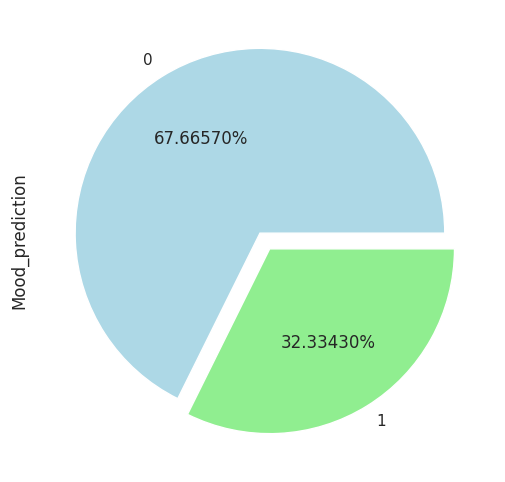

In [ ]:
df.Mood_prediction.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05))

In [ ]:
gender = pd.get_dummies(df.gender, prefix='gender')
N1 = pd.get_dummies(df.N1, prefix='N1')
N2 = pd.get_dummies(df.N2, prefix='N2')
N5 = pd.get_dummies(df.N5, prefix='N5')
N6 = pd.get_dummies(df.N6, prefix='N6')
N8 = pd.get_dummies(df.N8, prefix='N8')
N9 = pd.get_dummies(df.N9, prefix='N9')
N10 = pd.get_dummies(df.N10, prefix='N10')
A9 = pd.get_dummies(df.A9, prefix='A9')
C9 = pd.get_dummies(df.C9, prefix='C9')
N10 = pd.get_dummies(df.N10, prefix='N10')
concentration = pd.get_dummies(df.lack_of_concentration, prefix='concentration')
tiredeness = pd.get_dummies(df.tiredness, prefix='tiredness')
sleep_hour = pd.get_dummies(df.sleep_hour, prefix='sleep_hour')
labels = pd.get_dummies(df.Mood_prediction, prefix='condition')

In [ ]:
X = pd.concat([gender,N1,N2,N5,N6,N8,N9,N10,A9,C9,concentration,tiredeness,sleep_hour] , axis=1)

In [ ]:
labels.head()

,condition_0,condition_1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
y = labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 425)]             0         
                                                                 
 dense (Dense)               (None, 15)                6390      
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 6,572
Trainable params: 6,572
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
1183/1183 [==============================] - 4s 3ms/step - loss: 5.0966e-06 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 0.9996
Epoch 2/50
1183/1183 [==============================] - 3s 3ms/step - loss: 2.2455e-06 - acc: 1.0000 - val_loss: 9.9152e-04 - val_acc: 0.9996
Epoch 3/50
1183/1183 [==============================] - 3s 2ms/step - loss: 1.5113e-06 - acc: 1.0000 - val_loss: 9.5771e-04 - val_acc: 0.9996
Epoch 4/50
1183/1183 [==============================] - 2s 2ms/step - loss: 1.0848e-06 - acc: 1.0000 - val_loss: 8.7166e-04 - val_acc: 0.9996
Epoch 5/50
1183/1183 [==============================] - 3s 2ms/step - loss: 8.0071e-07 - acc: 1.0000 - val_loss: 5.5362e-04 - val_acc: 0.9996
Epoch 6/50
1183/1183 [==============================] - 3s 3ms/step - loss: 4.8211e-07 - acc: 1.0000 - val_loss: 4.4859e-04 - val_acc: 1.0000
Epoch 7/50
1183/1183 [==============================] - 3s 2ms/step - loss: 3.2013e-07 - acc: 1.0000 - val_loss: 3.2859e-04 - val_acc: 1.0000
Epoch 8/50

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
pbfile = files.upload()

In [ ]:
tflite_file = 'model.tflite'
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
files.download(tflite_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: {:.2f}%".format(score[1] * 100))


124/124 [==============================] - 0s 2ms/step - loss: 2.4349e-06 - acc: 1.0000
Test Accuracy: 100.00%


In [ ]:
import numpy as np

# create a test input with the same format as the training data
test_input = np.zeros((1, 425), dtype=np.float32)

# set some values for the test input
test_input[0, 0] = 1.0 # set gender to male
test_input[0, 3] = 1.0 # set N5 to strongly agree
test_input[0, 6] = 1.0 # set N8 to strongly agree
test_input[0, 8] = 1.0 # set A9 to strongly disagree
test_input[0, 11] = 1.0 # set lack of concentration to never
test_input[0, 12] = 1.0 # set tiredness to never
test_input[0, 13] = 1.0 # set sleep hour to 6-7

# load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_input)

# run the inference
interpreter.invoke()

# get the output tensor and convert to probabilities
output_data = interpreter.get_tensor(output_details[0]['index'])
probabilities = tf.nn.softmax(output_data)

# get the predicted class label
predicted_class = np.argmax(probabilities)

# print the predicted class label
print(predicted_class)


1
